In [1]:
import numpy as np  
  
import matplotlib.pyplot as plt 
%matplotlib inline
  
import pandas as pd  

from sklearn.tree import DecisionTreeRegressor  

# import export_graphviz 
from sklearn.tree import export_graphviz 

In [2]:
location = r'E:\MYLEARN\2-ANALYTICS-DataScience\datasets\dec-tree-practice-reg.xlsx'

In [3]:
df = pd.read_excel(location, sheet_name='Sheet2')

In [4]:
df

,tutorials,labs,exam
0,all,complete,74
1,some,partial,23
2,all,complete,61
3,all,complete,74
4,some,partial,25
5,all,complete,61
6,some,complete,54
7,some,partial,42
8,some,complete,55
9,all,complete,75


# Step 1 - 

Calculate the overall SD

In [5]:
label = 'exam'

In [6]:
# default is ddof=1
total_std_dev = np.std(df[label], ddof=1) 
total_std_dev

24.51180473626068

In [7]:
# default is ddof=1
df[label].std()

24.51180473626068

# Step 2 - 

Calculate the SD for each of the columns and then calculate the SD reduction

### for the columns 'outlook'

In [166]:
col_name ='tutorials'

In [167]:
df.groupby(col_name)[label].count()

tutorials
all     6
some    9
Name: exam, dtype: int64

In [168]:
df.groupby(col_name)[label].agg(np.std, ddof=1)

tutorials
all      6.742897
some    17.292420
Name: exam, dtype: float64

In [169]:
df.groupby(col_name)[label].agg(['count', np.std])

,count,std
tutorials,,
all,6,6.742897
some,9,17.292420


In [170]:
df.groupby(col_name)[label].agg(['count', np.std]).values

array([[ 6.        ,  6.7428975 ],
       [ 9.        , 17.29241966]])

In [171]:
indexes = df.groupby(col_name)[label].agg(['count', np.std]).index
indexes

Index(['all', 'some'], dtype='object', name='tutorials')

In [172]:
df_col_summary = pd.DataFrame(data    = df.groupby(col_name)[label].agg(['count', np.std]).values,
                              columns = ['count_rows', 'std_dev'])

df_col_summary[col_name] = indexes

df_col_summary

,count_rows,std_dev,tutorials
0,6.0,6.742897,all
1,9.0,17.292420,some


In [173]:
# total number of rows for the column
n_rows = df.shape[0]
n_rows

15

In [178]:
# calculate the Std dev and std dev reduction for the column
sd_col = 0.0
for ind, row in df_col_summary.iterrows():
    sd_col = sd_col + (row.count_rows * row.std_dev)/n_rows

sdr_col = total_std_dev - sd_col

print('Std dev of the col {} is {}, Std dev reduction is {}'.format(col_name, sd_col, sdr_col) )


Std dev of the col tutorials is 13.072610796536358, Std dev reduction is 11.439193939724321


# Step 3 -

repeat the above for all the remaining columns

In [179]:
# col_names = ['Temp', 'Humidity', 'Windy']
col_names = ['labs']

for col_name in col_names:

    indexes = df.groupby(col_name)[label].agg(['count', np.std]).index

    df_col_summary = pd.DataFrame(data    = df.groupby(col_name)[label].agg(['count', np.std]).values,
                                  columns = ['count_rows', 'std_dev'])

    df_col_summary[col_name] = indexes

    # calculate the Std dev and std dev reduction for the column
    sd_col = 0.0
    
    for ind, row in df_col_summary.iterrows():
        sd_col = sd_col + (row.count_rows * row.std_dev)/n_rows

    sdr_col = total_std_dev - sd_col
    
    print('Std dev of the col {} is {}, Std dev reduction is {}'.format(col_name, sd_col, sdr_col) )

Std dev of the col labs is 10.185428257507002, Std dev reduction is 14.326376478753676


# validate with scikit learn

### option 1. Using label encoding
the tree model a little hard to read though

In [100]:
df.head(3)

,Outlook,Temp,Humidity,Windy,Mins Played
0,Rainy,Hot,High,False,25
1,Rainy,Hot,High,True,30
2,Overcast,Hot,High,False,46


In [101]:
df["Outlook"]  = df["Outlook"].astype('category')
df["Temp"]     = df["Temp"].astype('category')
df["Humidity"] = df["Humidity"].astype('category')
df["Windy"]    = df["Windy"].astype('category')
df.dtypes

Outlook        category
Temp           category
Humidity       category
Windy          category
Mins Played       int64
dtype: object

In [102]:
df["Outlook"]  = df["Outlook"].cat.codes
df["Temp"]     = df["Temp"].cat.codes
df["Humidity"] = df["Humidity"].cat.codes
df["Windy"]    = df["Windy"].cat.codes


In [103]:
df.head(3)

,Outlook,Temp,Humidity,Windy,Mins Played
0,1,1,0,0,25
1,1,1,0,1,30
2,0,1,0,0,46


In [104]:
X = df.drop(['Mins Played'], axis=1)
y = df['Mins Played']

In [105]:
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and y data 
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

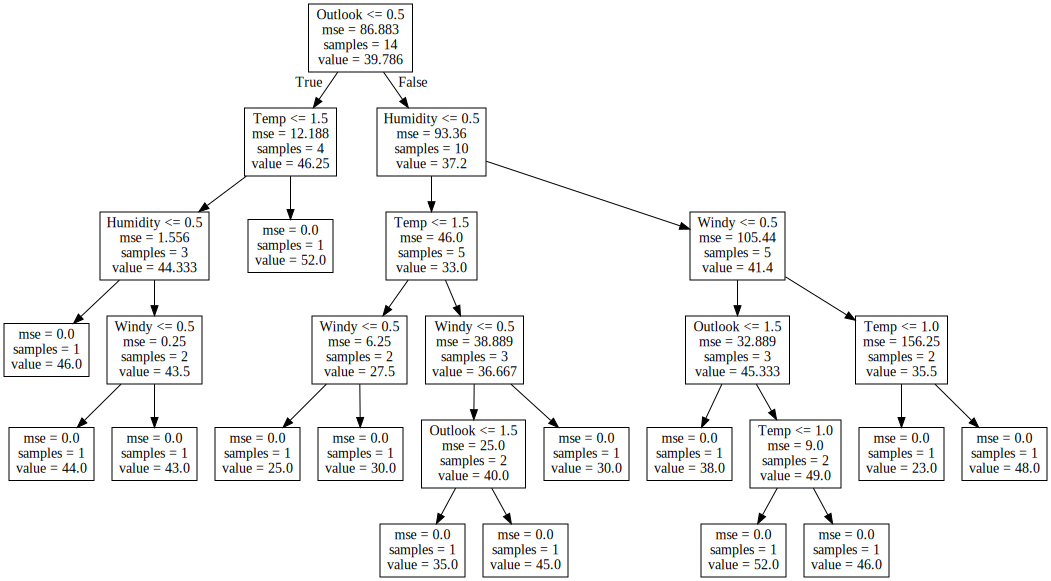

In [109]:
import graphviz

dot_data = export_graphviz( regressor, 
                            out_file = None, 
                            feature_names = df.drop(['Mins Played'], axis=1).columns)

graph = graphviz.Source(dot_data)  

graph.render(r"C:\Users\Admin\Desktop\tree") 
graph 

### option 2. Using OHE (dummies)
better tree representation

In [125]:
df = pd.read_excel(location)

In [126]:
df

,Outlook,Temp,Humidity,Windy,Mins Played
0,Rainy,Hot,High,False,25
1,Rainy,Hot,High,True,30
2,Overcast,Hot,High,False,46
3,Sunny,Mild,High,False,45
4,Sunny,Cool,Normal,False,52
5,Sunny,Cool,Normal,True,23
6,Overcast,Cool,Normal,True,43
7,Rainy,Mild,High,False,35
8,Rainy,Cool,Normal,False,38
9,Sunny,Mild,Normal,False,46


In [134]:
df_dummy = pd.get_dummies(df, columns=["Outlook", 'Temp', 'Humidity', 'Windy'])

In [135]:
df_dummy.shape

(14, 11)

In [136]:
X = df_dummy.drop(['Mins Played'], axis=1)
y = df_dummy['Mins Played']

In [138]:
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and y data 
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

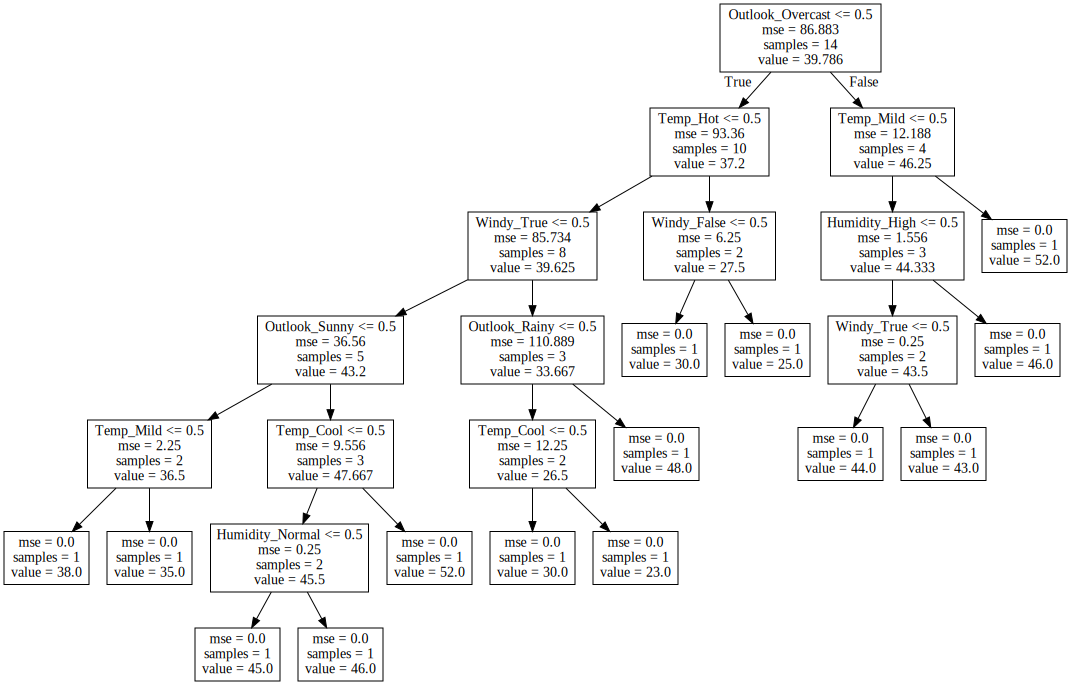

In [139]:
import graphviz

dot_data = export_graphviz( regressor, 
                            out_file = None, 
                            feature_names = df_dummy.drop(['Mins Played'], axis=1).columns)

graph = graphviz.Source(dot_data)  

graph.render(r"C:\Users\Admin\Desktop\reg_tree") 
graph 